# JBCS 2024: Neuromorphic Computing Workshop
_Kaitlin Fair, Visiting Scholar at USAFA_  
_kaitlin.fair@afacademy.af.edu_

This workshop will use the [Nengo simulator](https://www.nengo.ai/) to:
1. Take in an input array of four digits
2. Use spiking neurons to sort the array in ascending order using the simple Bubble Sort algorithm
3. Output a new, sorted array with spikes!

## But first, why Neuromorphic Engineering??

Brains vs (von-Neumann) Computers
![picture](https://drive.google.com/uc?id=1Oz5dL0RJ5Em_1RBvvFTXcQYRkXFelLj3)

Neuromorphic computing emphasizes _energy efficiency_, drawing inspiration from the brain's ability to perform complex computations with low power consumption.

![picture](https://drive.google.com/uc?id=1PuzevvU7z9gn22ARwl3r3DOWgMKnbp0r)

Other benefits:
- Parallel processing and event-driven nature make it well suited to applications that require rapid and continuous data processing, like robotics.
- Learning and adaptive capabilities enable algorithms to improve performance over time given ne wdata without explicit programming, like edge computing.
- Inspired by the brain's local processing and memory organization, systems typically reduce the need for extensive data movement, like remotely sending back data.

## How Biological Neurons Work

### Neuron Anatomy
![picture](https://drive.google.com/uc?id=105Yp3enZr4TmE8gffX2oyALmdt2Ovh3T)

### Membrane Action Potential
![picture](https://drive.google.com/uc?id=1vKK52WESCw3rBJMQ6KpJ6jLWND3vacsU)

## How Bubble Sort Works

Working left to right, compare two elements at a time and swap (if necessary) so that the higher number is to the right. By working all the way left to right, the highest number should end up in the correct position (the last position) after the "first pass":

![picture](https://drive.google.com/uc?id=1xgiv35XvIOFO4nJvWNSjaKVc5xg2yHdA)

After the first pass is completed, we can work left to right again, but this time for just the first three positions, since the fourth is already locked in from the previous step. The second largest value should end up in the third position after this pass:

![picture](https://drive.google.com/uc?id=1GFHYfv2fftz3s0SWd8OEURyE-XyWBWak)

Once the second pass is completed, we just need to rearrange the first two digits and we have a fully sorted array!

![picture](https://drive.google.com/uc?id=1ULWlf7zMR8zlimfB9-YvJmwBjohXMTVQ)




## Setup your Notebook

Now that you are neuroscience and Bubble Sort experts, let's code!

For this workshop, we will utilize the Nengo simulator to program a Bubble Sort using neurons!

Install and import Nengo and import other supporting libraries to get started:

In [ ]:
pip install nengo nengo-gui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.5/538.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.9/848.9 kB 9.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import nengo

from nengo.dists import Uniform
from nengo.utils.matplotlib import rasterplot


## Create your array to be sorted

To make it easy, we will use an array of four values that are shuffled each time we run the program.

In [ ]:
input_array = np.array([.2, .4, .6, .8])
np.random.shuffle(input_array)
input_array

array([0.6, 0.8, 0.2, 0.4])

## Create a Nengo Model and Encode Input Data

This model contains layers of neurons that will perform the Bubble Sort algorithm.

**First, we must convert the input data into spiking data using Nengo neuron ensembles.**

We start with Nengo nodes that provide the input as a constant value to the sorting neurons - this is essentially just a way to pass data from regular Python into a Nengo model. Each node will contain a value of the array. These nodes will then be connected to Nengo neuron ensembles that will convert the data to spikes (i.e. encode the data).

To understand how Nengo neurons encode inputs, let's look at a single neuron encoding just one of the values of our input array.

For another example on how this works: [Nengo Single Neuron Example](https://www.nengo.ai/nengo/examples/basic/single-neuron.html)

ERROR:nengo.cache:Decoder cache index corrupted. Reinitializing cache.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 467, in __enter__
    self._load_index_file()
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 389, in _load_index_file
    with self.index_path.open("rb") as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/nengo/decoders/index'


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

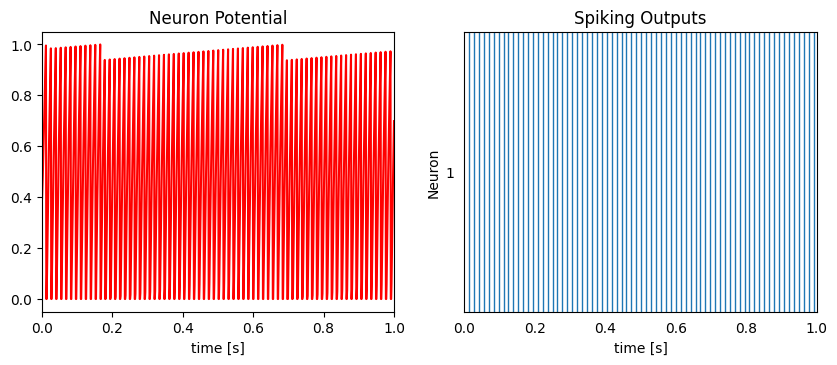

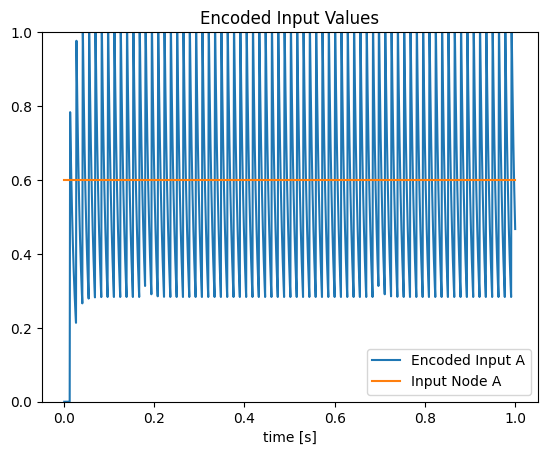

In [ ]:
# Create a model to perform the sorting
model = nengo.Network(label="SortArray")
with model:
    # Add input nodes for each value of the array
    input_node_A = nengo.Node(input_array[0])

    # Add a single neuron to encode the first value of the input array
    input_neuron_A = nengo.Ensemble(n_neurons=1, dimensions=1,
        # Set intercept to 0.1
        intercepts=Uniform(0,0),
        # Set the maximum firing rate of the neuron to 100hz
        max_rates=Uniform(100,100),
        # Set the neuron's firing rate to increase for positive input
        encoders=[[1]])

    # Connect the nodes to the encoding neurons
    nengo.Connection(input_node_A, input_neuron_A)

    ## Add probes so we can see the outputs at each step
    # This probe captures our constant input value from the array to be sorted
    input_probe_nodeA = nengo.Probe(input_node_A,)

    # This probe shows us how well our neurons can approximate our inputs
    input_probe_neuronA = nengo.Probe(input_neuron_A, synapse=0.01)

    # This probe captures the actual spikes from the neurons
    spikesA = nengo.Probe(input_neuron_A.neurons)

    # These probes show us our neuron potential
    membranePotentialA = nengo.Probe(input_neuron_A.neurons, "voltage")


# Build the simulator to run the model containing just input encoding
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)

# Plot the soma voltages of the neurons
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.plot(sim.trange(), sim.data[membranePotentialA][:, 0], "r")
plt.xlim(0, 1)
plt.xlabel("time [s]")
plt.title("Neuron Potential")

# Plot the spiking output of the ensemble
plt.subplot(222)
rasterplot(sim.trange(), sim.data[spikesA])
plt.ylabel("Neuron")
plt.xlabel("time [s]")
plt.title("Spiking Outputs")
plt.xlim(0, 1)

# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe_neuronA], label="Encoded Input A")
plt.plot(sim.trange(), sim.data[input_probe_nodeA], label="Input Node A")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Encoded Input Values")
plt.show()

##Analysis of one neuron encoding data

We would expect constant spikes evenly spaced (top left plot) as we are sending in a constant value.

We can see that the membrane potential increases (top right plot) and reaches a certain value, a spike is emmitted, and the membrane potential resets.

We can also see that this single neuron cannot perfectly represent our input value (bottom plot). We could fine tune parameters to a specific value to get it to perfectly represent it; however, that's not generalizable and we want to be able to take in any array!

## **Before we move on, try hand tuning the parameters and see if you can get a single neuron to better represent one of your input values. Possibly then try representing a different value and consider why it doesn't do as well as the first one you tuned (or maybe it does better?). Play with it!**






## Increase the number of neurons to encode your data
Let's try to use an ensemble of 10 neurons to encode the same value of our input array.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

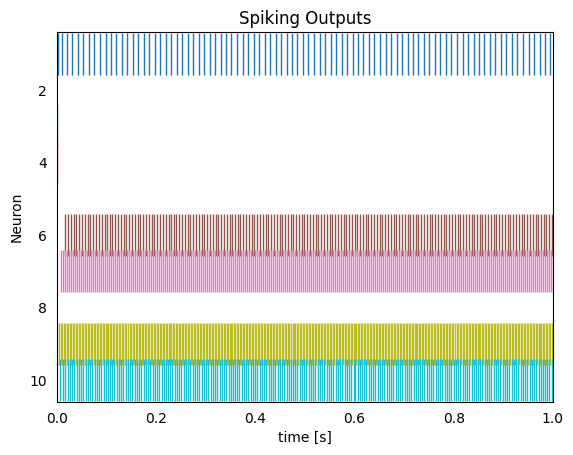

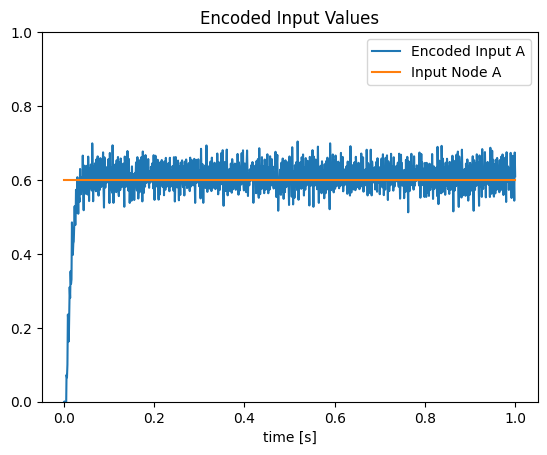

In [ ]:
# Create a model to perform the sorting
model = nengo.Network(label="SortArray")
with model:
    # Add input nodes for each value of the array
    input_node_A = nengo.Node(input_array[0])

    # Add a neuron ensemble of 10 neurons to encode a value of the input array
    input_neuron_A = nengo.Ensemble(n_neurons=10, dimensions=1)

    # Connect the nodes to the encoding neurons
    nengo.Connection(input_node_A, input_neuron_A)

    ## Add probes so we can see the outputs at each step
    # This probe captures our constant input value from the array to be sorted
    input_probe_nodeA = nengo.Probe(input_node_A,)

    # This probe shows us how well our neurons can approximate our inputs
    input_probe_neuronA = nengo.Probe(input_neuron_A, synapse=0.01)

    # This probe captures the actual spikes from the neurons
    spikesA = nengo.Probe(input_neuron_A.neurons)

# Build the simulator to run the model containing just input encoding
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)

# Plot the spiking output of the ensemble
t = sim.trange()
plt.figure()
rasterplot(sim.trange(), sim.data[spikesA])
plt.ylabel("Neuron")
plt.xlabel("time [s]")
plt.title("Spiking Outputs")
plt.xlim(0, 1)

# Plot the input signals and decoded ensemble values
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe_neuronA], label="Encoded Input A")
plt.plot(sim.trange(), sim.data[input_probe_nodeA], label="Input Node A")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Encoded Input Values")
plt.show()

## Analysis of 10 neurons encoding data

Here you may have noticed we did not declare our intercepts, firing rates, or encoder values for our neuron ensemble of 10 neurons. This is because Nengo can randomly set these values to most accurately represent the data.

Default values:
- Max firing rates: randomly between 200 and 400Hz  
- Intercepts: randomly vary between -1 and 1  
- Encoders: randomly choose +1 or -1  

As a result, we have different firing rates coming out of each neuron (top plot). Some are sensitive to negative values only or the intercept is set to a value well below our input value, so we don't see any spikes out of those neurons!

We can also see our neurons represent our input value far better than one neuron did. If we continue to increase the number of neurons in the ensemble, the representation will get better and better - and we will do that!

For another example on representing data with multiple neurons: [Nengo Many Neurons Example](https://www.nengo.ai/nengo/examples/basic/many-neurons.html)

## **Before we move on, try different numbers of neurons to see when things start to look better.**





## Encode all inputs for sorting

Now that we understand how inputs might be encoded (i.e. converted to spikes) by Nengo, let's encode all four of our array values to be used in our model. Our model will sort the input values into ascending order (lowest to highest).

Just to check, we will also visualize our encoded input array.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

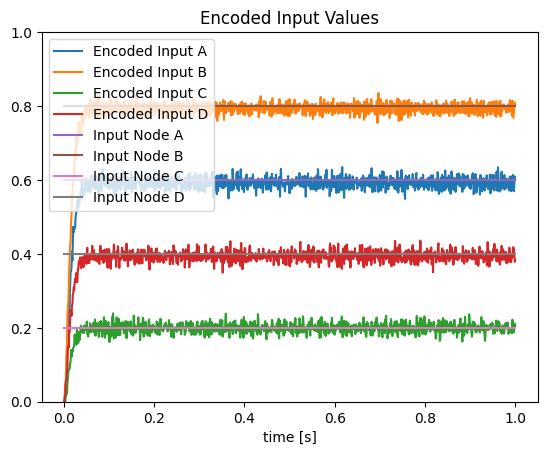

In [ ]:
# Create a model to perform the sorting
model = nengo.Network(label="SortArray")
with model:
    # Add input nodes for each value of the array
    input_node_A = nengo.Node(input_array[0])
    input_node_B = nengo.Node(input_array[1])
    input_node_C = nengo.Node(input_array[2])
    input_node_D = nengo.Node(input_array[3])

    # Add neuron ensembles to encode each value of the array
    input_neuron_A = nengo.Ensemble(n_neurons=100, dimensions=1)
    input_neuron_B = nengo.Ensemble(n_neurons=100, dimensions=1)
    input_neuron_C = nengo.Ensemble(n_neurons=100, dimensions=1)
    input_neuron_D = nengo.Ensemble(n_neurons=100, dimensions=1)

    # Connect the nodes to the encoding neurons
    nengo.Connection(input_node_A, input_neuron_A)
    nengo.Connection(input_node_B, input_neuron_B)
    nengo.Connection(input_node_C, input_neuron_C)
    nengo.Connection(input_node_D, input_neuron_D)

    # Add probes so we can see the outputs at each step
    input_probe_nodeA = nengo.Probe(input_node_A,)
    input_probe_nodeB = nengo.Probe(input_node_B)
    input_probe_nodeC = nengo.Probe(input_node_C)
    input_probe_nodeD = nengo.Probe(input_node_D)

    # These probes show us how well our neurons can approximate our inputs
    input_probe_neuronA = nengo.Probe(input_neuron_A, synapse=0.01)
    input_probe_neuronB = nengo.Probe(input_neuron_B, synapse=0.01)
    input_probe_neuronC = nengo.Probe(input_neuron_C, synapse=0.01)
    input_probe_neuronD = nengo.Probe(input_neuron_D, synapse=0.01)

# Build the simulator to run the model containing just input encoding
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)

# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe_neuronA], label="Encoded Input A")
plt.plot(sim.trange(), sim.data[input_probe_neuronB], label="Encoded Input B")
plt.plot(sim.trange(), sim.data[input_probe_neuronC], label="Encoded Input C")
plt.plot(sim.trange(), sim.data[input_probe_neuronD], label="Encoded Input D")
plt.plot(sim.trange(), sim.data[input_probe_nodeA], label="Input Node A")
plt.plot(sim.trange(), sim.data[input_probe_nodeB], label="Input Node B")
plt.plot(sim.trange(), sim.data[input_probe_nodeC], label="Input Node C")
plt.plot(sim.trange(), sim.data[input_probe_nodeD], label="Input Node D")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Encoded Input Values")
plt.show()

## Set up neurons to perform the comparisons required for Bubble Sort

We need neuron ensembles to compare each of the inputs from left to right, two at a time.

From the details on the Bubble Sort algorithm, for an array of four values, you will need to perform a compare function 6 times to sort the array into ascending order.

![picture](https://drive.google.com/uc?id=1fDDmMP8SyXB0heJNml1u7IlIH1WD41yH)
![picture](https://drive.google.com/uc?id=1KwxRVt7QS0OuGxVoNxUid7Tk5w54phX3)
![picture](https://drive.google.com/uc?id=12b22xoJ7CNNu-JoAMnYe-0MBnTKCgdgS)


Due to the nature of Nengo, for each of these 6 comparisons, we need a 2D neuron `combine_neuron_N` to take in the two digits to be compared, then connect the output of that neuron to a neuron that represents the greater value `larger_neuron_N` and a neuron that represents the smaller value `smaller_neuron_N`.

For an example and more discussion on 2D neurons: [Multiplication using Nengo](https://www.nengo.ai/nengo/examples/basic/multiplication.html)  
For even higher dimensions: [Matrix Multiplication](https://www.nengo.ai/nengo/examples/advanced/matrix-multiplication.html)

Notice that we set up all of these ensembles exactly as we did for our input encoding, except our comparator neurons are 2D to recieve two neuron inputs that will remain distinct inputs so they can be compared (versus all coming in at once, which would just add the input spikes!).

In [ ]:
with model:
    combine_neuron_1 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_2 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_3 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_4 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_5 = nengo.Ensemble(n_neurons=200, dimensions=2)
    combine_neuron_6 = nengo.Ensemble(n_neurons=200, dimensions=2)

    larger_neuron_1 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_2 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_3 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_4 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_5 = nengo.Ensemble(n_neurons=200, dimensions=1)
    larger_neuron_6 = nengo.Ensemble(n_neurons=200, dimensions=1)

    smaller_neuron_1 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_2 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_3 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_4 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_5 = nengo.Ensemble(n_neurons=200, dimensions=1)
    smaller_neuron_6 = nengo.Ensemble(n_neurons=200, dimensions=1)

We now have neurons set aside to perform the comparison functions, but in order to actually do so the network must train weights to compute the comparison of two values at a time.

![picture](https://drive.google.com/uc?id=1fPff8_tcIuTANmqk4L3uDRIhSGyQ1n-O)

We won't get into exactly how Nengo trains its weights, but if you want to learn about that, [this video](https://youtu.be/JCA2gOhN5oM?si=GuYYNgXd7LM5VKEp&t=3542) talks about it from about 1hr to 1hr 35mins.

In Nengo, we can define a function that trains weights between each `combine_neuron_N` and `larger_neuron_N` such that the greater value is returned from the `larger_neuron_N` ensemble.

Similarly we define a function that trains weights between each `combine_neuron_N` and `smaller_neuron_N` such that the lower value is returned from the `smaller_neuron_N` ensemble.

In [ ]:
with model:
    # Create a function to return the largest value
    def higher_val(x):
        if x[0]>x[1]:
            return x[0]
        else:
            return x[1]

    # Create a function to return the smaller value
    def lower_val(x):
        if x[0]<x[1]:
            return x[0]
        else:
            return x[1]

## Connect all the things!

Now we need to connect all of our neurons to sort. Pay special attention to the block diagram of our Bubble Sort implementation to connect the right neurons to one another.

In [ ]:
with model:
    # Connect input nodes to the appropriate combine neuron ensembles
    # Add the functions to the larger and smaller neurons to train the weights

    # Compare 1
    nengo.Connection(input_neuron_A, combine_neuron_1[0])
    nengo.Connection(input_neuron_B, combine_neuron_1[1])

    nengo.Connection(combine_neuron_1, smaller_neuron_1, function=lower_val)
    nengo.Connection(combine_neuron_1, larger_neuron_1, function=higher_val)

    # Compare 2
    nengo.Connection(larger_neuron_1,combine_neuron_2[0])
    nengo.Connection(input_neuron_C, combine_neuron_2[1])

    nengo.Connection(combine_neuron_2, smaller_neuron_2, function=lower_val)
    nengo.Connection(combine_neuron_2, larger_neuron_2, function=higher_val)

    # Compare 3
    nengo.Connection(larger_neuron_2,combine_neuron_3[0])
    nengo.Connection(input_neuron_D, combine_neuron_3[1])

    nengo.Connection(combine_neuron_3, smaller_neuron_3, function=lower_val)
    nengo.Connection(combine_neuron_3, larger_neuron_3, function=higher_val) #output 4

    # Compare 4
    nengo.Connection(smaller_neuron_1,combine_neuron_4[0])
    nengo.Connection(smaller_neuron_2, combine_neuron_4[1])

    nengo.Connection(combine_neuron_4, smaller_neuron_4, function=lower_val)
    nengo.Connection(combine_neuron_4, larger_neuron_4, function=higher_val)

    # Compare 5
    nengo.Connection(larger_neuron_4,combine_neuron_5[0])
    nengo.Connection(smaller_neuron_3, combine_neuron_5[1])

    nengo.Connection(combine_neuron_5, smaller_neuron_5, function=lower_val)
    nengo.Connection(combine_neuron_5, larger_neuron_5, function=higher_val) #output 3

    # Compare 6
    nengo.Connection(smaller_neuron_4,combine_neuron_6[0])
    nengo.Connection(smaller_neuron_5, combine_neuron_6[1])

    nengo.Connection(combine_neuron_6, smaller_neuron_6, function=lower_val) #output 1
    nengo.Connection(combine_neuron_6, larger_neuron_6, function=higher_val) #output 2

Add probes to the output so that we can see how well our neurons sorted our input array.

In [ ]:
with model:
    # add probes to output neurons (those contributing to the sorted array)
    out_probe_1 = nengo.Probe(smaller_neuron_6,synapse=0.01)
    out_probe_2 = nengo.Probe(larger_neuron_6,synapse=0.01)
    out_probe_3 = nengo.Probe(larger_neuron_5,synapse=0.01)
    out_probe_4 = nengo.Probe(larger_neuron_3,synapse=0.01)

    ## add debug probes (or probes if you want to see all of the steps)
    #compare_probe_1 = nengo.Probe(combine_neuron_1,synapse=0.01)
    #compare_probe_2 = nengo.Probe(combine_neuron_2,synapse=0.01)
    #compare_probe_3 = nengo.Probe(combine_neuron_3,synapse=0.01)
    #compare_probe_4 = nengo.Probe(combine_neuron_4,synapse=0.01)
    #compare_probe_5 = nengo.Probe(combine_neuron_5,synapse=0.01)
    #compare_probe_6 = nengo.Probe(combine_neuron_6,synapse=0.01)
    #smaller_probe_1 = nengo.Probe(smaller_neuron_1,synapse=0.01)
    #smaller_probe_2 = nengo.Probe(smaller_neuron_2,synapse=0.01)
    #smaller_probe_3 = nengo.Probe(smaller_neuron_3,synapse=0.01)
    #smaller_probe_4 = nengo.Probe(smaller_neuron_4,synapse=0.01)
    #smaller_probe_5 = nengo.Probe(smaller_neuron_5,synapse=0.01)
    #smaller_probe_6 = nengo.Probe(smaller_neuron_6,synapse=0.01)
    #larger_probe_1 = nengo.Probe(larger_neuron_1,synapse=0.01)
    #larger_probe_2 = nengo.Probe(larger_neuron_2,synapse=0.01)
    #larger_probe_3 = nengo.Probe(larger_neuron_3,synapse=0.01)
    #larger_probe_4 = nengo.Probe(larger_neuron_4,synapse=0.01)
    #larger_probe_5 = nengo.Probe(larger_neuron_5,synapse=0.01)
    #larger_probe_6 = nengo.Probe(larger_neuron_6,synapse=0.01)


Create your simulator to run the neuron dynamics over time

In [ ]:
with nengo.Simulator(model) as sim:
    # Run it for 2 seconds
    sim.run(2)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Plot the data!

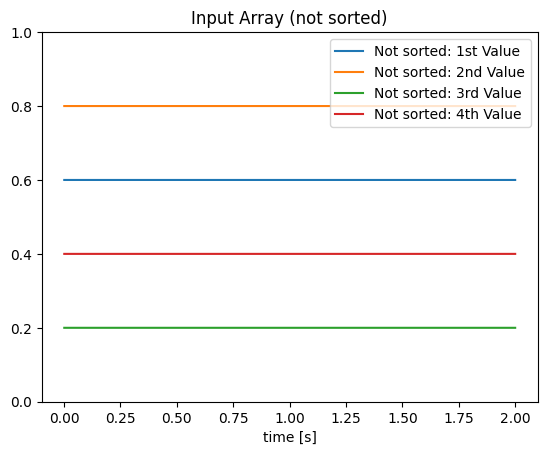

Input Array = [0.6 0.8 0.2 0.4]


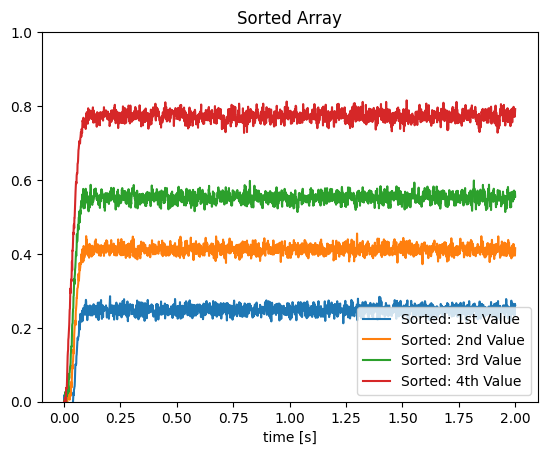

In [ ]:
## Plot the results!
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe_nodeA], label="Not sorted: 1st Value")
plt.plot(sim.trange(), sim.data[input_probe_nodeB], label="Not sorted: 2nd Value")
plt.plot(sim.trange(), sim.data[input_probe_nodeC], label="Not sorted: 3rd Value")
plt.plot(sim.trange(), sim.data[input_probe_nodeD], label="Not sorted: 4th Value")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Input Array (not sorted)")
plt.show()

print("Input Array =", input_array)

## Plot the results!
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[out_probe_1], label="Sorted: 1st Value")
plt.plot(sim.trange(), sim.data[out_probe_2], label="Sorted: 2nd Value")
plt.plot(sim.trange(), sim.data[out_probe_3], label="Sorted: 3rd Value")
plt.plot(sim.trange(), sim.data[out_probe_4], label="Sorted: 4th Value")
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")
plt.title("Sorted Array")
plt.show()

## Discussion

Precision
- When I first coded this, I noticed that the outputs weren't perfectly .2, .4, .6, or .8. They were close and certainly in order, but the values weren't precise. I found that by adding neurons to the comparator and to the larger/smaller neurons, the computations were more consistently precise. I believe this is because only 100 weights could not be trained to perfectly compute. More weights would mean higher precision, and by doubling the number of neurons in the ensemble I saw better performance.
- Because we know all of our values are greater than 1, we could have adjusted our neuron ensembles to only contain neurons that respond to values above 0. This would have give us more precise representations throughout our model.
- If we choose values greater than 1 in our input array, we need to adjust the radius of each of our neurons. If the neuron's radius is 1 (Nengo's default), then it can only accurately encode values up to 1. The radii would need to be adjusted to handle arrays that held values larger than 1.

Optimization
- We could certainly change the number of neurons being used in each ensemble to minimize the number of neurons required and therefore reduce simulation time as well as power used should we have mapped this to neuromorphic hardware.
- Because the process is the same for comparators and finding the higher and lower value for each pair, we could reuse these neurons! This adds a lot of complexity in terms of how we input our data so as to not saturate our neurons, so we left that out for this workshop.
- We also did not generalize this code - this notebook can only work for a 4-element array. We could certainly update it to use recurring neurons for any sized array, which would make this generally useful code for others and far more computationally efficient.

## **If there's time, go back and play with some of the parameters: number of neurons, place additional probes, change your input array values, etc.**



## Resources:
- [Overview paper on Nengo](https://www.frontiersin.org/articles/10.3389/fninf.2013.00048/full)
- [Nengo Introductory tutorials](https://www.nengo.ai/nengo/examples.html)
- [How to download Nengo](https://www.nengo.ai/nengo/getting-started.html)
- [A virtual simulator to work with NengoDL](https://github.com/kaitlin-fair/495venv_setup)
- [Spiking Neural Nets on NengoDL](https://github.com/kaitlin-fair/NeuralNets) - if you play with this, do the DNN exercise first, then the SNN exercise. Email me for the key :)
- [Intro to Neuroscience YouTube Vids by Bing Brunton](https://www.youtube.com/playlist?list=PLqgZEQsU_8E0l1P9bKR6yKOKPMpoJ_tLR)